In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


In [2]:
ds=load_digits()
ds

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [3]:
x=pd.DataFrame(ds.data)
x.head()

0    1    2     3     4     5    6    7    8    9  ...    54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0 ...   5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0 ...   9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]

In [4]:
y=ds.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
y_imb=y.copy()
y_imb[y_imb != 1] = 0
print(y[1:30])
print(y_imb[1:30])

[1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
[1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [6]:
np.bincount(y_imb)

array([1615,  182], dtype=int32)

In [7]:
X_train,X_test,y_train,y_test=train_test_split(x,y_imb,test_size=.25,random_state=0)

# Logistic

In [8]:
from sklearn.linear_model import LogisticRegression
dlf=LogisticRegression()
dlf.fit(X_train,y_train)
dlf.score(X_train,y_train)

0.9933184855233853

In [9]:
log_score=dlf.score(X_test,y_test)
log_score

0.9733333333333334

In [10]:
predictLog=dlf.predict(X_test)


In [11]:
import seaborn as sns
sns.regplot(predictLog,y_test,logistic=True)

# Decision Tree


In [12]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=4)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.9806978470675576

In [13]:
tree_score=clf.score(X_test,y_test)
tree_score

0.9711111111111111

In [14]:
predTree=clf.predict(X_test)
predTree

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
pd.DataFrame({'Feature':x.columns,'Importance':clf.feature_importances_})

Feature  Importance
0         0    0.000000
1         1    0.000000
2         2    0.000000
3         3    0.000757
4         4    0.000000
5         5    0.022543
6         6    0.000000
7         7    0.000000
8         8    0.000000
9         9    0.046658
10       10    0.128113
11       11    0.000000
12       12    0.000000
13       13    0.000000
14       14    0.000000
15       15    0.000000
16       16    0.000000
17       17    0.000000
18       18    0.000000
19       19    0.327474
20       20    0.135201
21       21    0.000000
22       22    0.000000
23       23    0.000000
24       24    0.000000
25       25    0.000000
26       26    0.000000
27       27    0.102396
28       28    0.000000
29       29    0.000000
..      ...         ...
34       34    0.027404
35       35    0.000000
36       36    0.000000
37       37    0.002910
38       38    0.000000
39       39    0.000000
40       40    0.000000
41       41    0.000000
42       42    0.019741
43       43    0.000000
44       44    0.000000
45       45    0.000000
46       46    0.165870
47       47    0.000000
48       48    0.000000
49       49    0.000000
50       50    0.000000
51       51    0.000000
52       52    0.000000
53       53    0.000000
54       54    0.000000
55       55    0.000000
56       56    0.000000
57       57    0.000000
58       58    0.000000
59       59    0.000000
60       60    0.000000
61       61    0.020933
62       62    0.000000
63       63    0.000000

[64 rows x 2 columns]

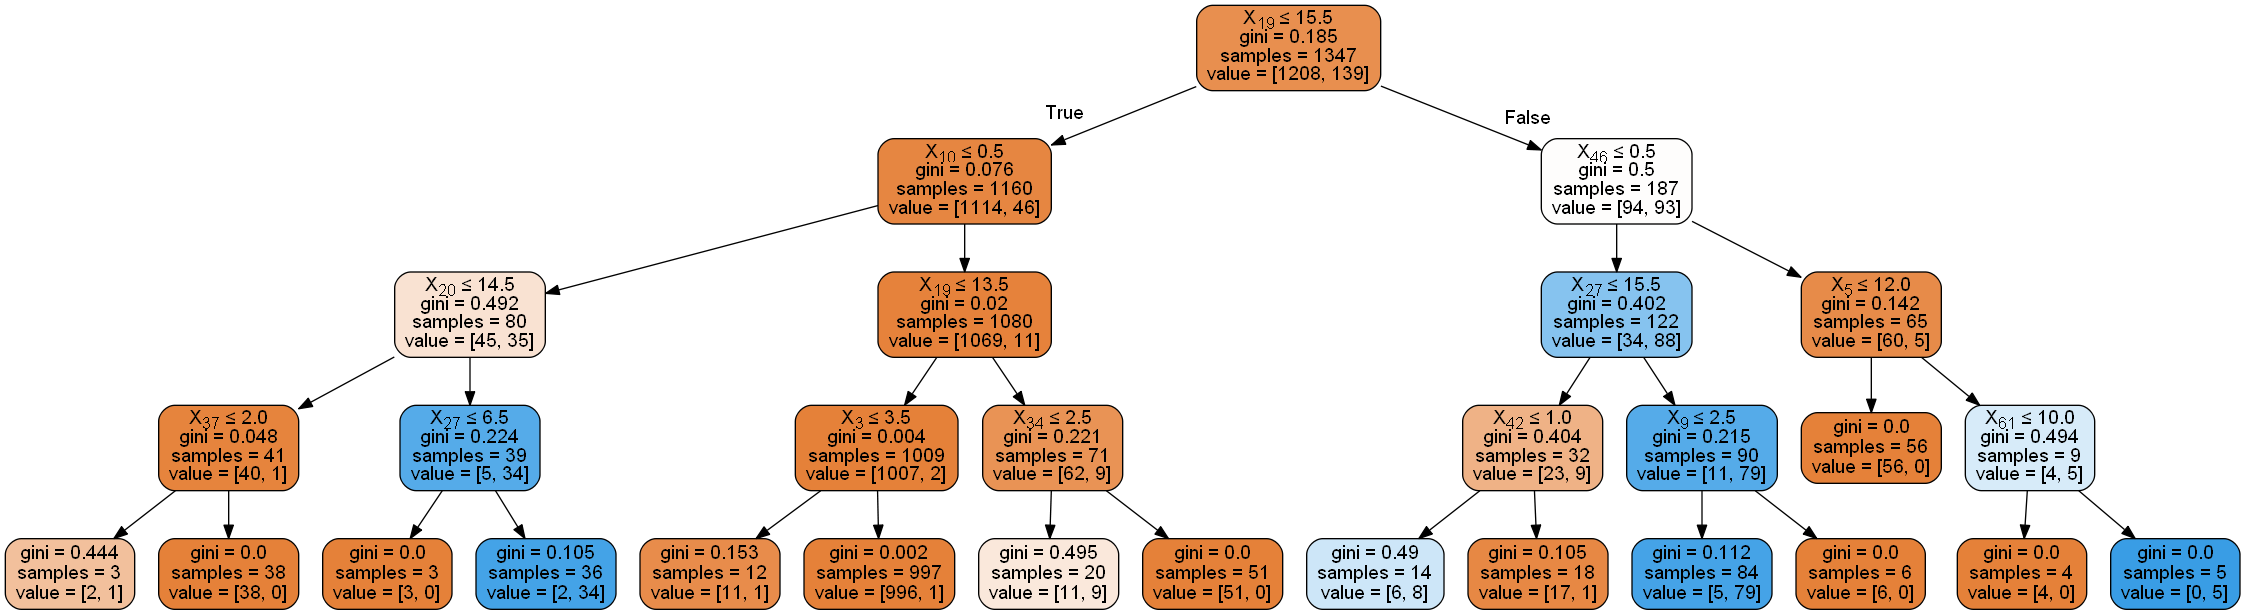

In [16]:
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


# Dummy Classifier 

can use:
1) most_frequent
2) stratified
3) uniform
4) constant

In [17]:
from sklearn.dummy import DummyClassifier
dummyCLF=DummyClassifier(strategy='uniform')

dummyCLF.fit(X_train,y_train)
dum_score=dummyCLF.score(X_test,y_test)
dum_score

0.4777777777777778

In [18]:
predDum=dummyCLF.predict(X_test)
predDum

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,

In [19]:
b

NameError: name 'b' is not defined

# Confusion Matrix 

In [22]:
from sklearn.metrics import confusion_matrix
tree_confussion=confusion_matrix(y_test,predTree)
log_confusion=confusion_matrix(y_test,predictLog)
dum_confusion=confusion_matrix(y_test,predDum)
print("Decision Tree : \n{} \nLogistic : \n{} \nDummy : \n{}".format(tree_confussion,log_confusion,dum_confusion))

Decision Tree : 
[[403   4]
 [  9  34]] 
Logistic : 
[[401   6]
 [  6  37]] 
Dummy : 
[[211 196]
 [ 21  22]]


In [23]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score

print("Accuracy Score : {} \nprecision : {} \nRecall : {} \nF1 : {}".format(accuracy_score(y_test,predictLog),precision_score(y_test,predictLog),recall_score(y_test,predictLog),f1_score(y_test,predictLog)))

Accuracy Score : 0.9733333333333334 
precision : 0.8604651162790697 
Recall : 0.8604651162790697 
F1 : 0.8604651162790697


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictLog,target_names=['0','1']))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       407
          1       0.86      0.86      0.86        43

avg / total       0.97      0.97      0.97       450



In [25]:
from sklearn.metrics import roc_curve
probs=dlf.predict_proba(X_test)
probs

array([[1.00000000e+00, 8.64991408e-11],
       [9.99998684e-01, 1.31581263e-06],
       [1.00000000e+00, 3.69668988e-10],
       [9.99999994e-01, 6.17337247e-09],
       [9.99999997e-01, 2.70824052e-09],
       [9.99941570e-01, 5.84296376e-05],
       [5.29832933e-03, 9.94701671e-01],
       [9.99999996e-01, 4.10714399e-09],
       [1.00000000e+00, 1.26197339e-11],
       [1.00000000e+00, 3.32231364e-10],
       [1.00000000e+00, 3.24327392e-11],
       [9.99999997e-01, 3.14687540e-09],
       [1.00000000e+00, 1.57963329e-10],
       [9.99980154e-01, 1.98458339e-05],
       [9.99993305e-01, 6.69456886e-06],
       [9.99982930e-01, 1.70695169e-05],
       [1.35617155e-05, 9.99986438e-01],
       [1.00000000e+00, 9.76519123e-13],
       [9.99997415e-01, 2.58497207e-06],
       [1.00000000e+00, 5.90829163e-12],
       [1.00000000e+00, 3.97452542e-10],
       [9.99995002e-01, 4.99849706e-06],
       [1.00000000e+00, 4.32246424e-11],
       [9.99911256e-01, 8.87435540e-05],
       [1.000000

In [26]:
probs=probs[:,1]n
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_test,probs)
print("Auc : %.3f" % auc)

Auc : 0.991


In [ ]:
# ROC CURVE AND OTHERS

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, probs)


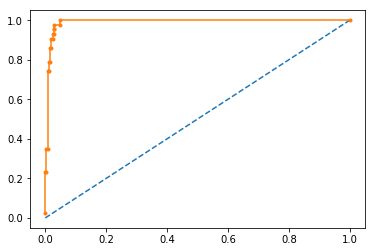

In [30]:
from matplotlib import pyplot
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

# Precision curve

In [33]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, probs)

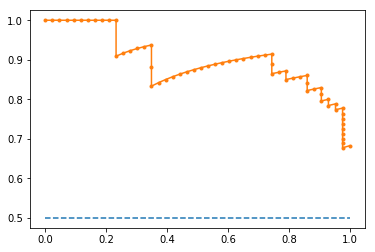

In [36]:
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()